## Data General Exploration

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# load data
df = pd.read_csv('/content/drive/MyDrive/Text Sentiment Lab/Dataset/cleaned_SuicideAndDepression_detection.csv')

In [4]:
# show first 10 rows
df.head(10)

,text,class
0,life actually work non depressed people seem p...,depression
1,found friend bodyit almost nine year ago still...,depression
2,ex wife threatening suiciderecently left wife ...,suicide
3,weird get affected compliment coming someone k...,normal
4,finally almost never hear bad year ever swear ...,normal
5,reddit never opened anyone life problem much h...,depression
6,somebody help terrible episode tonight feel ho...,depression
7,anymorei hidden away summer room even leave ge...,depression
8,need helpjust help cry hard,suicide
9,losthello name adam struggling year afraid pas...,suicide


In [5]:
# show last 10 rows
df.tail(10)

,text,class
348099,something today went sledding friend may seem ...,normal
348100,need hugi really depressed lately main coping ...,depression
348101,like rock going get anything go musictaste spa...,normal
348102,drink lot like iti year old used drinking ever...,depression
348103,sleep cycle existon day usually sleep day noth...,depression
348104,tell many friend lonely everything deprived pr...,normal
348105,pee probably taste like salty tea someone dran...,normal
348106,usual stuff find herei posting sympathy pity k...,suicide
348107,confronted mother extremely isolated thought h...,depression
348108,still beaten first bos hollow knight fought ti...,normal


In [6]:
# show data dimensions
df.shape

(348109, 2)

In [7]:
# show data types
df.dtypes

text     object
class    object
dtype: object

In [8]:
# show overall data description
df.describe()

,text,class
count,348015,348109
unique,347453,3
top,real suppleroot hour day far,suicide
freq,19,116037


In [9]:
# check value counts of 3 classes
df['class'].value_counts()

suicide       116037
normal        116037
depression    116035
Name: class, dtype: int64

In [10]:
# check missing values
df.isnull().sum()

text     94
class     0
dtype: int64

In [11]:
# check duplicates
df.duplicated().sum()

595

## Data Cleaning

In [12]:
# change class label
df['class'] = df['class'].replace({'teenagers' : 'normal', 'SuicideWatch' : 'suicide'})
df['class'].value_counts()

suicide       116037
normal        116037
depression    116035
Name: class, dtype: int64

In [13]:
# drop missing values
df = df.dropna()
df.isnull().sum()

text     0
class    0
dtype: int64

In [14]:
# drop duplicated although detected 0 duplicate (double check)
df = df.drop_duplicates()
df.duplicated().sum()

0

## Text Cleaning (Text Column)

In [18]:
import pandas as pd
import re
import contractions
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [19]:
# change apostrophe
def replace_apostrophe(text):
    return text.replace("’", "'")

# lowercase text
def lowercase_text(text):
    return text.lower()

df['text'] = df['text'].apply(lowercase_text)
df['text'] = df['text'].apply(replace_apostrophe)
df.head(10)


,text,class
0,life actually work non depressed people seem p...,depression
1,found friend bodyit almost nine year ago still...,depression
2,ex wife threatening suiciderecently left wife ...,suicide
3,weird get affected compliment coming someone k...,normal
4,finally almost never hear bad year ever swear ...,normal
5,reddit never opened anyone life problem much h...,depression
6,somebody help terrible episode tonight feel ho...,depression
7,anymorei hidden away summer room even leave ge...,depression
8,need helpjust help cry hard,suicide
9,losthello name adam struggling year afraid pas...,suicide


In [20]:
import pandas as pd
import wordninja
import re

# Apply word segmentation tot he 'text' column in the DataFrame
df['text'] = df['text'].apply(lambda x: ' '.join(wordninja.split(x)))
df.head(10)

,text,class
0,life actually work non depressed people seem p...,depression
1,found friend body it almost nine year ago stil...,depression
2,ex wife threatening suicide recently left wife...,suicide
3,weird get affected compliment coming someone k...,normal
4,finally almost never hear bad year ever swear ...,normal
5,reddit never opened anyone life problem much h...,depression
6,somebody help terrible episode tonight feel ho...,depression
7,anymore i hidden away summer room even leave g...,depression
8,need help just help cry hard,suicide
9,lost hello name adam struggling year afraid pa...,suicide


In [21]:
# expand the words like cnnt to cannot / ve to have and so on
def expand_contractions(text):

    expanded_text = contractions.fix(text)
    return expanded_text

df['text'] = df['text'].apply(expand_contractions)
df.head(10)


,text,class
0,life actually work non depressed people seem p...,depression
1,found friend body it almost nine year ago stil...,depression
2,ex wife threatening suicide recently left wife...,suicide
3,weird get affected compliment coming someone k...,normal
4,finally almost never hear bad year ever swear ...,normal
5,reddit never opened anyone life problem much h...,depression
6,somebody help terrible episode tonight feel ho...,depression
7,anymore i hidden away summer room even leave g...,depression
8,need help just help cry hard,suicide
9,lost hello name adam struggling year afraid pa...,suicide


In [22]:
# Remove words equal to or less than 2 characters in length
def remove_short_words(text):
    return ' '.join([word for word in text.split() if len(word) > 2])

# remove symbols
def remove_symbols(text):
    symbol_pattern = re.compile(r'[\(\)\[\]:]')
    return symbol_pattern.sub('', text)

# remove symbols and digits
def remove_symbols_digits(text):
    return re.sub('[^a-zA-Z\s]', ' ', text)

# remove emoji
def remove_emoji(text):
    return re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U0001FB00-\U0001FBFF\U0001FE00-\U0001FE0F\U0001F004]+', '', text)

# remove URLs
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# remove HTML tags
def remove_html_tags(text):
    return re.sub(r'<[^>]+>', '', text)

# remove extra whitespace
def remove_whitespace(text):
    return ' '.join(text.split())

# remove punctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return ' '.join([token for token in text.split() if token.lower() not in stop_words])

# lemmatizing text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(token) for token in text.split()])

# Apply preprocessing techniques sequentially
df['text'] = df['text'].apply(remove_short_words)
df['text'] = df['text'].apply(remove_html_tags)
df['text'] = df['text'].apply(remove_urls)
df['text'] = df['text'].apply(remove_emoji)
df['text'] = df['text'].apply(remove_symbols_digits)
df['text'] = df['text'].apply(remove_symbols)
df['text'] = df['text'].apply(remove_punctuation)
df['text'] = df['text'].apply(remove_stopwords)
df['text'] = df['text'].apply(lemmatize_text)
df['text'] = df['text'].apply(remove_whitespace)


In [23]:
df.head(10)

,text,class
0,life actually work non depressed people seem p...,depression
1,found friend body almost nine year ago still t...,depression
2,wife threatening suicide recently left wife go...,suicide
3,weird get affected compliment coming someone k...,normal
4,finally almost never hear bad year ever swear ...,normal
5,reddit never opened anyone life problem much h...,depression
6,somebody help terrible episode tonight feel ho...,depression
7,anymore hidden away summer room even leave get...,depression
8,need help help cry hard,suicide
9,lost hello name adam struggling year afraid pa...,suicide


## Tokenize

In [24]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# tokenize text
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply tokenization to the text column in the DataFrame
df['text'] = df['text'].apply(tokenize_text)

df.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,text,class
0,"[life, actually, work, non, depressed, people,...",depression
1,"[found, friend, body, almost, nine, year, ago,...",depression
2,"[wife, threatening, suicide, recently, left, w...",suicide
3,"[weird, get, affected, compliment, coming, som...",normal
4,"[finally, almost, never, hear, bad, year, ever...",normal
5,"[reddit, never, opened, anyone, life, problem,...",depression
6,"[somebody, help, terrible, episode, tonight, f...",depression
7,"[anymore, hidden, away, summer, room, even, le...",depression
8,"[need, help, help, cry, hard]",suicide
9,"[lost, hello, name, adam, struggling, year, af...",suicide


In [25]:
from nltk.corpus import words
import nltk

# Download the list of English words (if not already downloaded)
nltk.download('words')

# Load the set of English words
english_words = set(words.words())

# List of words to exclude from removal
words_to_exclude = {'fuck'}  # Add your specific words here

# Function to remove non-English words from a list of tokens
def remove_non_english(tokens):
    english_tokens = [
        token if (token in english_words or token in words_to_exclude) else ''
        for token in tokens]
    return [token for token in english_tokens if token != '']

# Apply the function to the 'text' column in the DataFrame
df['text'] = df['text'].apply(remove_non_english)
df.head(10)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


,text,class
0,"[life, actually, work, non, depressed, people,...",depression
1,"[found, friend, body, almost, nine, year, ago,...",depression
2,"[wife, threatening, suicide, recently, left, w...",suicide
3,"[weird, get, affected, compliment, coming, som...",normal
4,"[finally, almost, never, hear, bad, year, ever...",normal
5,"[never, anyone, life, problem, much, help, lit...",depression
6,"[somebody, help, terrible, episode, tonight, f...",depression
7,"[hidden, away, summer, room, even, leave, get,...",depression
8,"[need, help, help, cry, hard]",suicide
9,"[lost, hello, name, struggling, year, afraid, ...",suicide


In [26]:
# join the tokens data back to detoken then check duplicated as tokens data is list cant check duplicated
df['text'] = df['text'].apply(lambda tokens: ' '.join(tokens))
df.duplicated().sum()

908

In [27]:
# review duplicated
df[df.duplicated()]

,text,class
4716,anyone want talk,normal
6768,,normal
7840,,normal
7895,,normal
9060,made channel look,normal
...,...,...
346367,yeah gay,normal
346756,posting pic everyday cheer day enjoy user brig...,normal
346905,,normal
347097,horny,normal


In [28]:
# review one of the duplicate row
df[df['text'] == 'horny']

,text,class
139447,horny,normal
347097,horny,normal


In [29]:
#drop duplicates
df = df.drop_duplicates()

In [30]:
# doublecheck missing values as after text cleaning might have blank data
df.isnull().sum()

text     0
class    0
dtype: int64

In [31]:
#check empty string
df[df['text'] == '']

,text,class
1662,,normal
10377,,depression
11019,,suicide


In [32]:
#filter empty string
df = df[df['text'] != '']
df.shape

(346600, 2)

In [35]:
#last check without token data
df.isnull().sum()

text     0
class    0
dtype: int64

In [36]:
#last check without token data
df.duplicated().sum()

0

In [38]:
# Apply tokenization to the text column in the DataFrame
df['text'] = df['text'].apply(tokenize_text)
df.head()

,text,class
0,"[life, actually, work, non, depressed, people,...",depression
1,"[found, friend, body, almost, nine, year, ago,...",depression
2,"[wife, threatening, suicide, recently, left, w...",suicide
3,"[weird, get, affected, compliment, coming, som...",normal
4,"[finally, almost, never, hear, bad, year, ever...",normal


# EDA

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

## Word length histogram


In [40]:
# find the highest number of token in a row
max = 0
for row in df['text']:
  if (len(row) > max):
    max = len(row)


<Axes: >

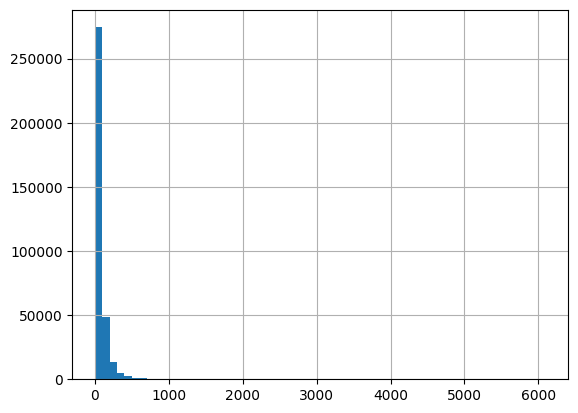

In [51]:
df['text'].map(lambda x: len(x)).hist(bins=range(0, max, 100))

<Axes: >

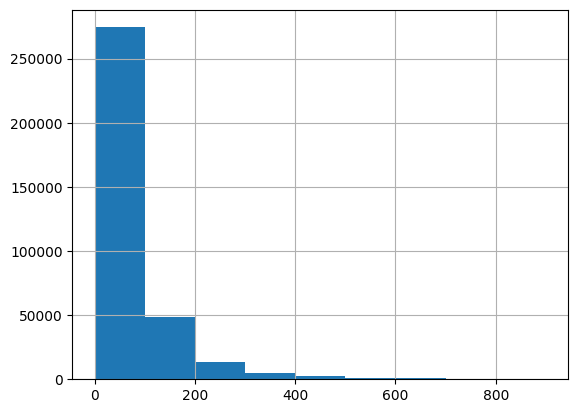

In [52]:
df['text'].map(lambda x: len(x)).hist(bins=range(0, 1000, 100))

In [80]:
# remove outlier
# Filter rows based on length less than or equal to 800
df_filtered = df[df['text'].apply(lambda x: len(x) <= 800)]

# If you want to reset index after filtering
df_filtered.reset_index(drop=True, inplace=True)

## Visualization Suicide Vs Non-Suicide

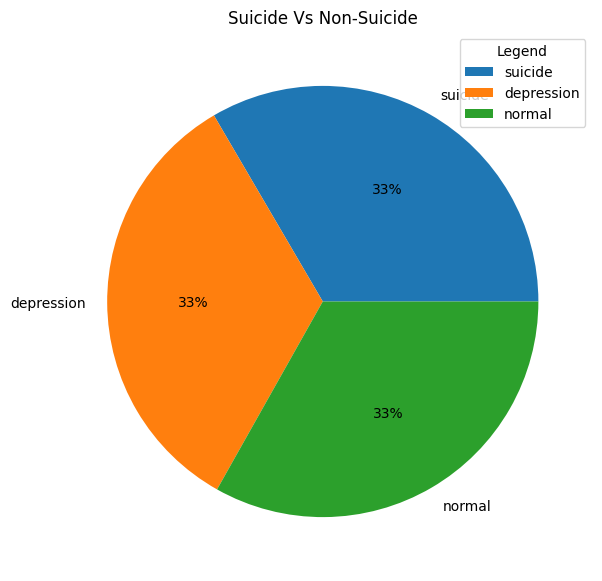

In [54]:
dfClass = df_filtered['class'].value_counts()
plt.figure(figsize = ((20,7)))
plt.pie(dfClass,labels = dfClass.index,autopct='%.0f%%')
plt.title('Suicide Vs Non-Suicide')
plt.legend(dfClass.index, title='Legend', loc='upper right')
plt.show()

## Word Freqency

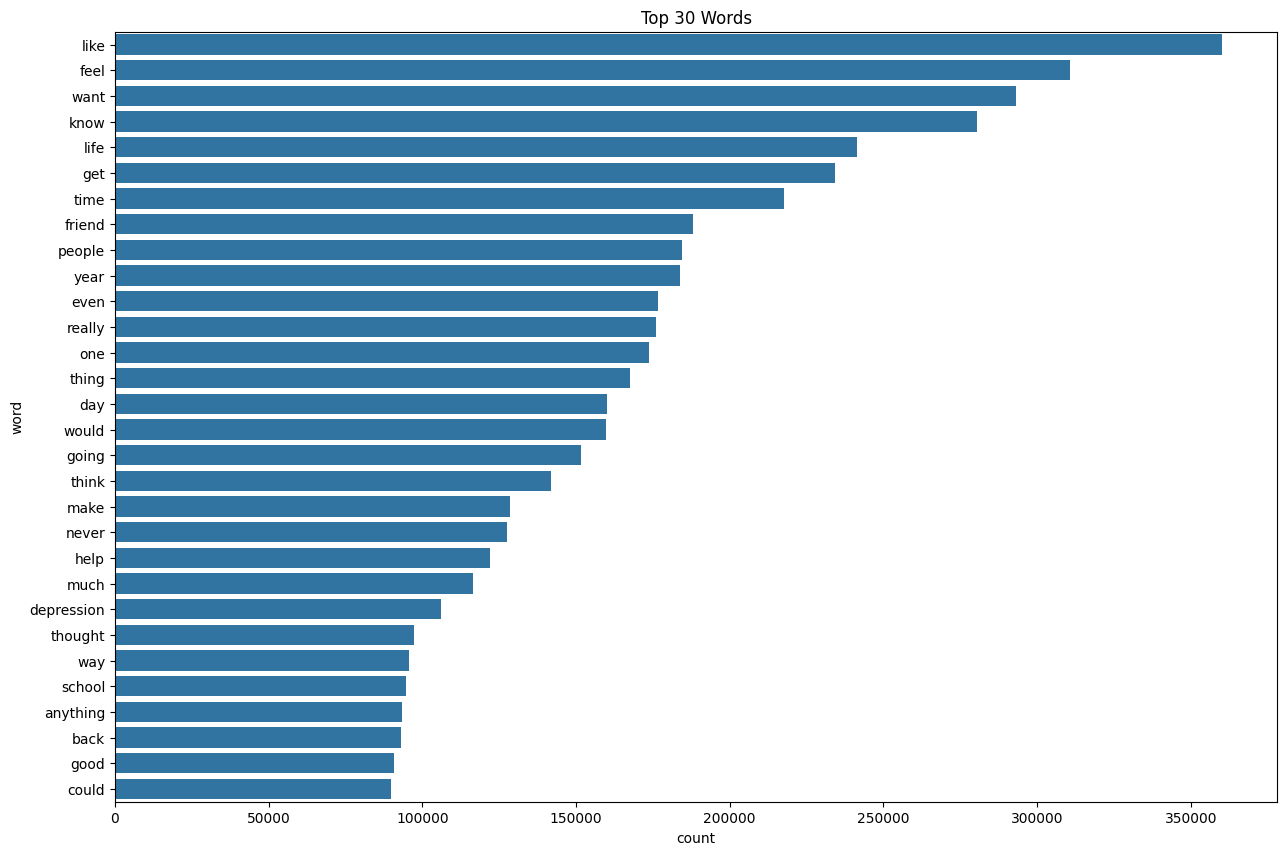

In [55]:
from nltk.probability import FreqDist
# Tokenize using NLTK
corpus = [text for text in df_filtered['text']]

# Flatten the list of tokens
corpus_flat = [word for sublist in corpus for word in sublist]

# Compute word frequencies using NLTK's FreqDist
word_freq = FreqDist(corpus_flat)

# Convert FreqDist to DataFrame
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['word', 'count']).sort_values(by='count', ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x='count',y='word',data=word_freq_df.head(30))
plt.title('Top 30 Words')
plt.show()

## Word cloud


In [82]:
# join the tokens data back to detoken then check duplicated as tokens data is list cant check duplicated
# This is neccessary to create a corpus for word cloud
df_string = df_filtered['text'].apply(lambda tokens: ' '.join(tokens))



In [61]:
from wordcloud import WordCloud

### Overall

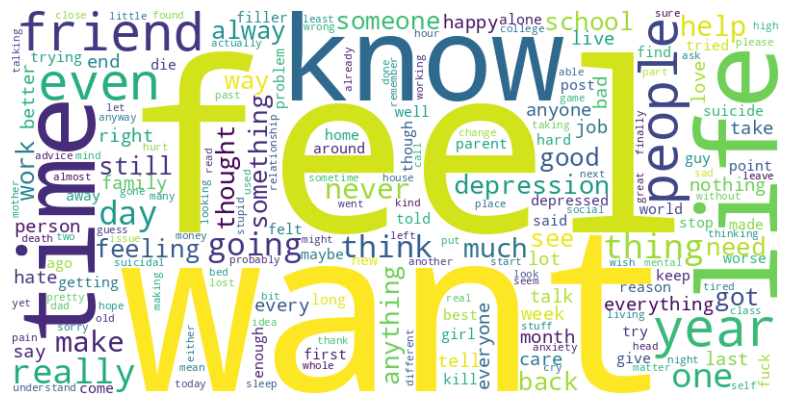

In [63]:
text = ' '.join(df_string['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Suicide

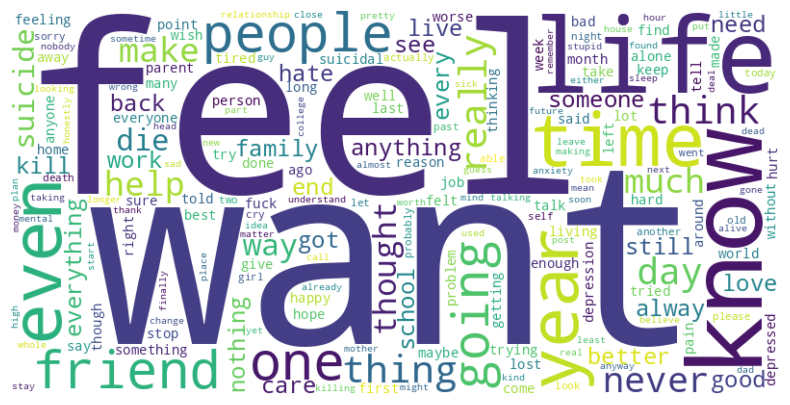

In [64]:
text = ' '.join(df_string.loc[df_string['class'] == 'suicide']['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Depression

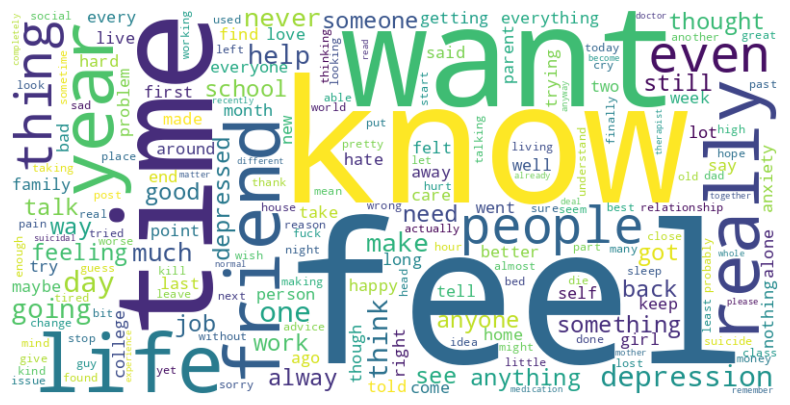

In [65]:
text = ' '.join(df_string.loc[df_string['class'] == 'depression']['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Normal

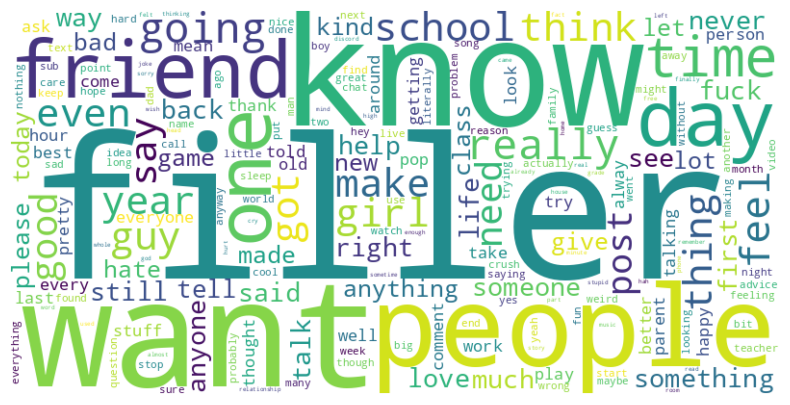

In [66]:
text = ' '.join(df_string.loc[df_string['class'] == 'normal']['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## N-Gram Exploration

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

In [68]:
def _get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                    for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

### Bigram

<Axes: >

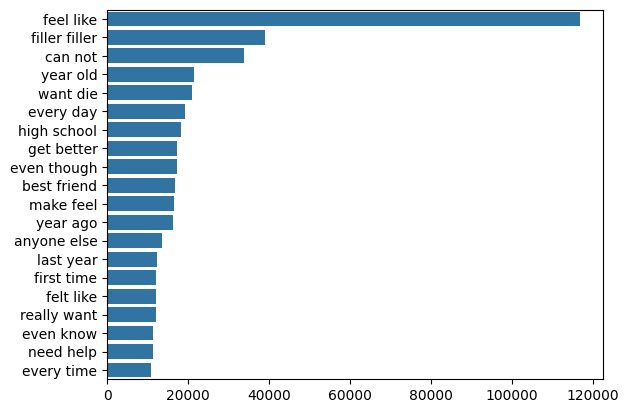

In [69]:
top_n_bigrams=_get_top_ngram(df_string['text'],2)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

### Trigram

<Axes: >

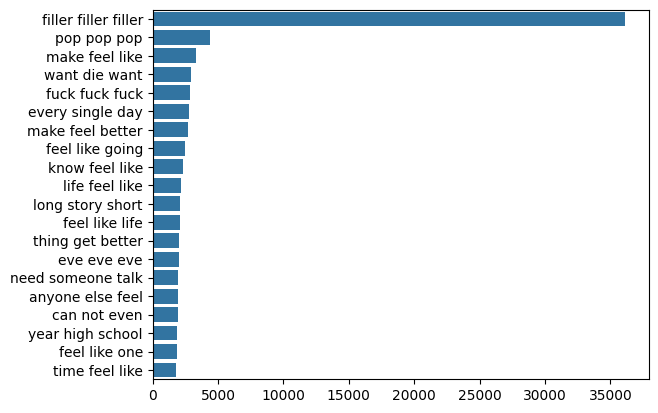

In [70]:
top_n_bigrams=_get_top_ngram(df_string['text'],3)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

In [72]:
df_string

,text,class
0,life actually work non depressed people seem p...,depression
1,found friend body almost nine year ago still t...,depression
2,wife threatening suicide recently left wife go...,suicide
3,weird get affected compliment coming someone k...,normal
4,finally almost never hear bad year ever swear ...,normal
...,...,...
345972,tell many friend lonely everything bought litt...,normal
345973,pee probably taste like salty tea someone dran...,normal
345974,usual stuff find posting sympathy pity know fa...,suicide
345975,mother extremely isolated thought hey guy bit ...,depression


In [84]:
df_filtered

,text,class
0,"[life, actually, work, non, depressed, people,...",depression
1,"[found, friend, body, almost, nine, year, ago,...",depression
2,"[wife, threatening, suicide, recently, left, w...",suicide
3,"[weird, get, affected, compliment, coming, som...",normal
4,"[finally, almost, never, hear, bad, year, ever...",normal
...,...,...
345972,"[tell, many, friend, lonely, everything, bough...",normal
345973,"[pee, probably, taste, like, salty, tea, someo...",normal
345974,"[usual, stuff, find, posting, sympathy, pity, ...",suicide
345975,"[mother, extremely, isolated, thought, hey, gu...",depression


In [85]:
# save cleaned csv (WITH TOKENIZE)
df_filtered.to_csv("cleaned_SuicideAndDepression_detection_with_Token.csv", index=False)

In [87]:
# save cleaned csv (WITHOUT TOKENIZE)
df_string.to_csv("cleaned_SuicideAndDepression_detection_without_Token.csv", index=False)